In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,
                        4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 
                    60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 
                    56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 
                    81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 
                    109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])

df = pd.DataFrame({'experiencia' : experiencia, 'salario' : salario})

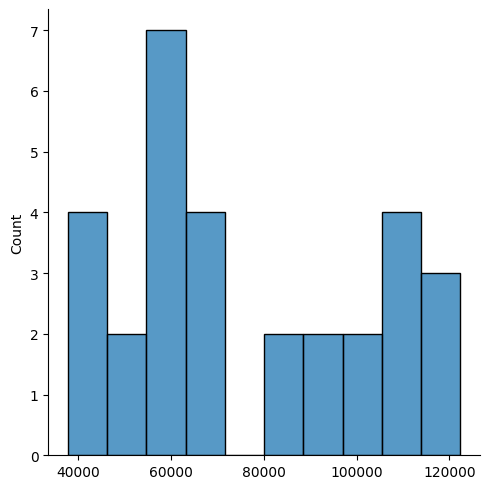

In [4]:
sns.displot(salario, bins=10)
plt.show()

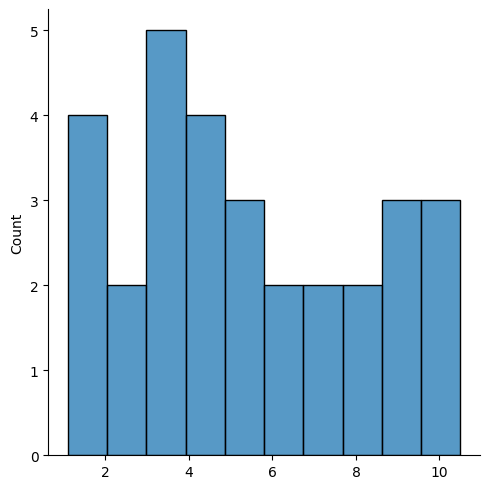

In [5]:
sns.displot(experiencia, bins=10)
plt.show()

In [6]:
np.corrcoef(df['experiencia'], df['salario'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

<AxesSubplot: >

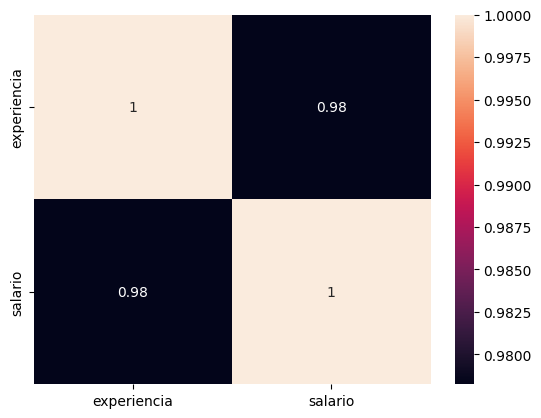

In [7]:
sns.heatmap(df.corr(), annot=True) 

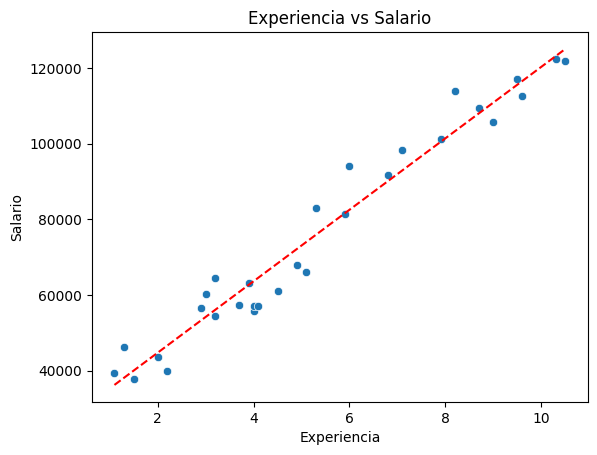

In [8]:
sns.scatterplot(x="experiencia", y="salario", data=df)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')

z = np.polyfit(df['experiencia'], df['salario'], 1)
p = np.poly1d(z)
plt.plot(df['experiencia'],p(df['experiencia']),"r--")
plt.show()
plt.show()

In [9]:
print('Maximo valor {}'.format(df['salario'].max()))
print(f'Minimo valor {df.salario.min()}')
print('Media {}'.format(df['salario'].mean()))
print('Mediana {}'.format(df['salario'].median()))
print('Desviacion estandar {}'.format(df['salario'].std()))

Maximo valor 122391.0
Minimo valor 37731.0
Media 76003.0
Mediana 65237.0
Desviacion estandar 27414.4297845823


In [10]:
x_experiencia = df.experiencia
y_salario = df.salario
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_experiencia, y_salario, test_size=0.2, random_state=42)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (24,)
x_test:  (6,)
y_train:  (24,)
y_test:  (6,)


In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [17]:
from sklearn import metrics

In [15]:
y_test_pred = model.predict(x_test.values.reshape(-1,1))

In [19]:
r2 = metrics.r2_score(y_test, y_test_pred)
print('The model perfomance for testing test')
print('--------------------------------------')
print('R2 score is {}'.format(r2))

The model perfomance for testing test
--------------------------------------
R2 score is 0.9024461774180497


In [26]:
print('La pendiente del modelo es igual a:', model.coef_)
print('el intercepto del modelo es: ', model.intercept_)

La pendiente del modelo es igual a: [[9423.81532303]]
el intercepto del modelo es:  [25321.58301178]


In [38]:
pred_salary = model.predict(experiencia.values.reshape(-1,1))
pred_salary[0:5]

array([[35687.77986711],
       [37572.54293172],
       [39457.30599632],
       [44169.21365784],
       [46053.97672244]])

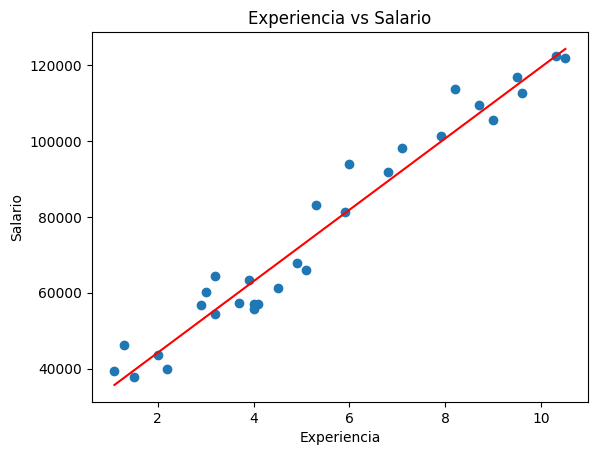

In [35]:
plt.scatter(experiencia, salario)
plt.plot(experiencia, pred_salary, color='red')
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [62]:
df1 = pd.DataFrame({'Real': salario, 'Prediccion': pred_salary.reshape(-1)})
df1.head()

,Real,Prediccion
0,39343.0,35687.779867
1,46205.0,37572.542932
2,37731.0,39457.305996
3,43525.0,44169.213658
4,39891.0,46053.976722


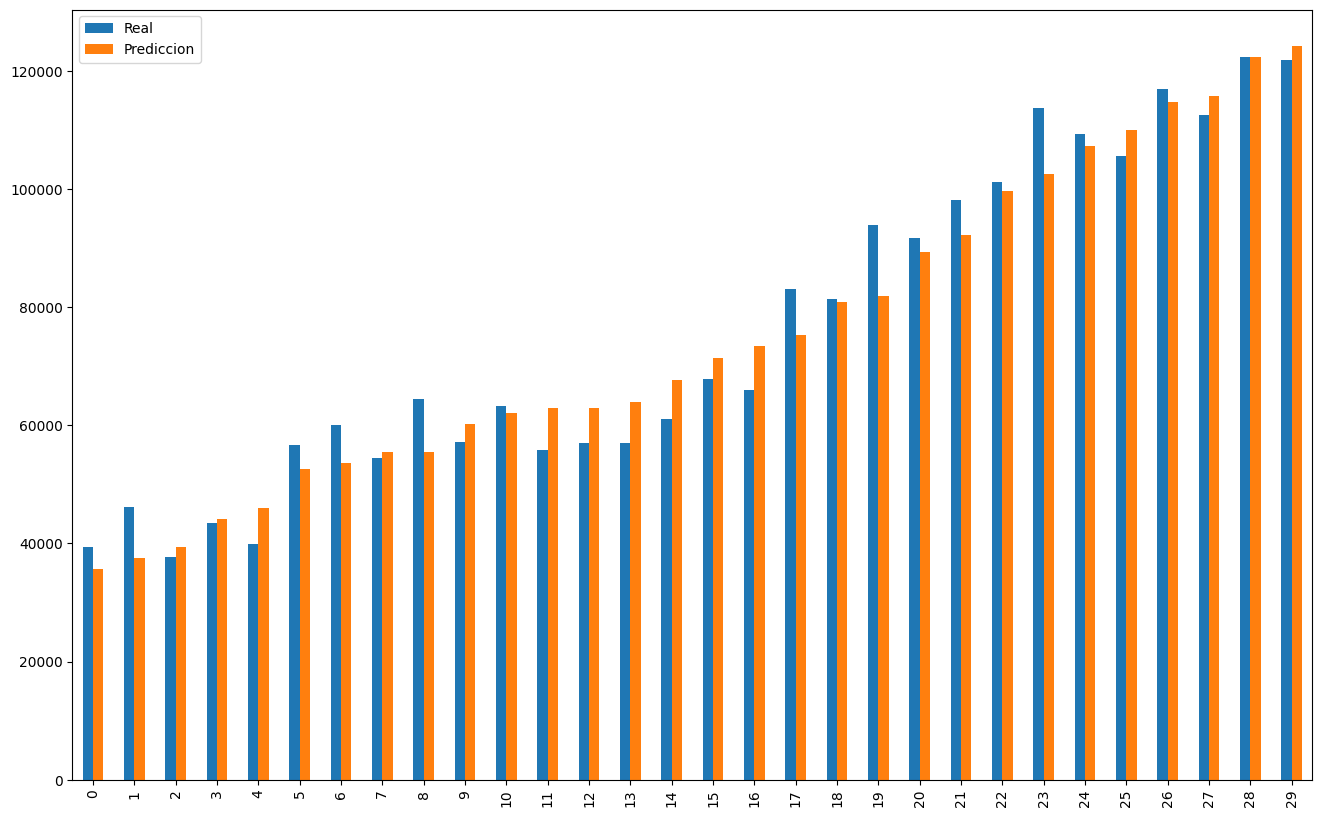

In [66]:
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [69]:
from sklearn import datasets 
dfboston = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
